In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/Titanic/data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()  #total null값을 계산하기 위함

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### How many Survived?

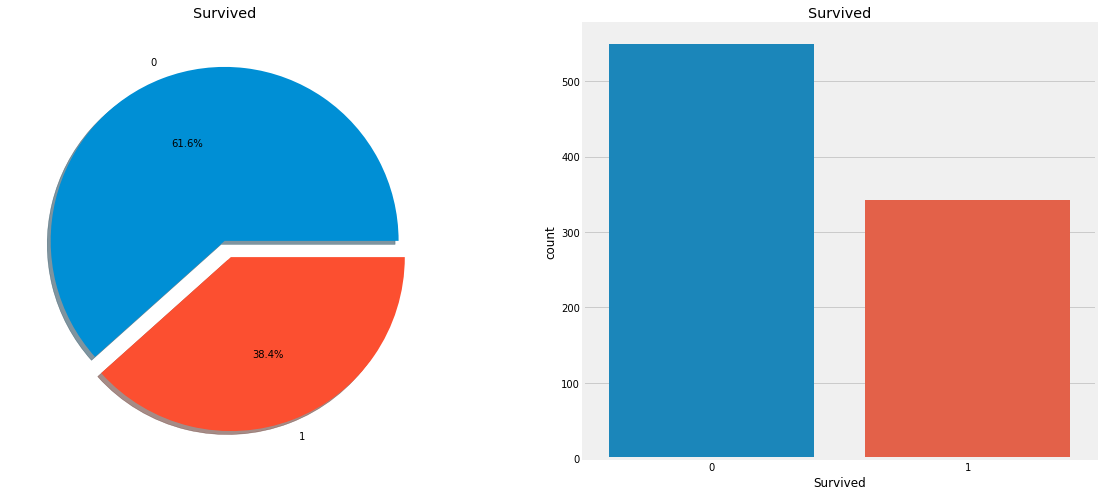

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)  #value_counts : 어떤 column안에 있는 특정 데이터의 수를 count 해주는 것
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

전체 인원의 38.4%만이 생존했다는 사실을 알 수 있다. 

앞으로의 분석에서는 어떤 feature가 생존에 영향을 주었는지, 얼마나 주었는지를 분석하고자 한다.

### Data Type

1. Categorical Features : Sex, Embarked와 같이 카테고리별로 분류될 수 있으면서 순서나 등급이 없는 데이터 타입을 의미한다.

2. Ordinal Features : Pclass와 같이 카테고리별로 분류될 수 있으면서 순서나 등급이 존재하는 데이터 타입을 의미한다.

3. Continous Feautures : Age와 같이 연속적인 값을 갖는 데이터를 의미한다.

### Analysis Features

1. Categorical

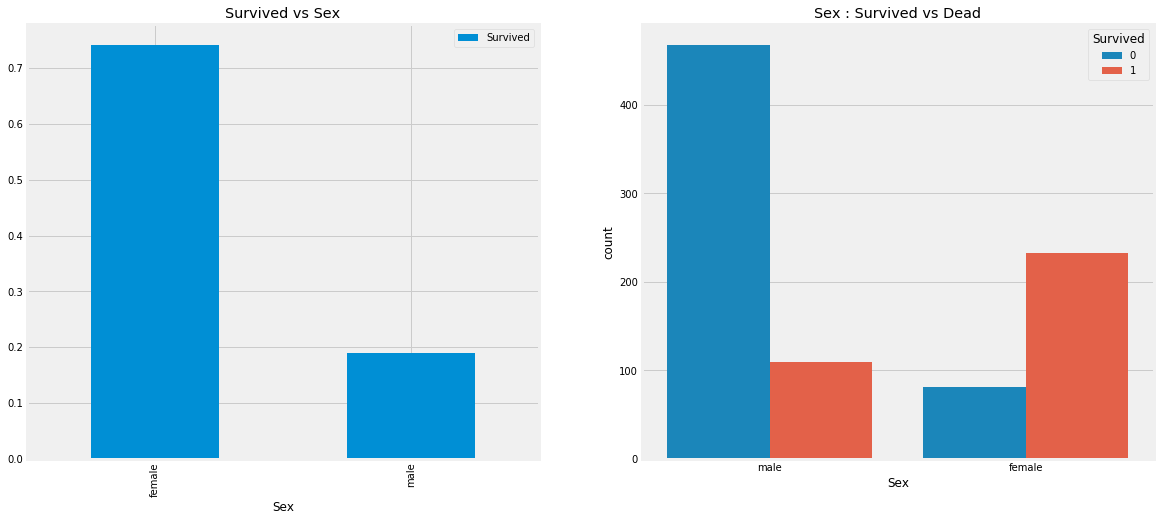

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()  #groupby : groupby([a,b])는 a,b에 대해서 data의 통계량을 구하는 것이다. 
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

남성이 여성보다 배에 많이 탑승하였고, 여성이 남성보다 높은 생존률을 갖는다고 확인할 수 있다.

--> 매우 중요한 분석!

### Categorical data

2. Pclass

In [7]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')  #데이터를 표로 재구성하는 것. 그리고 그 정도를 색의 진하기로 나타낸다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


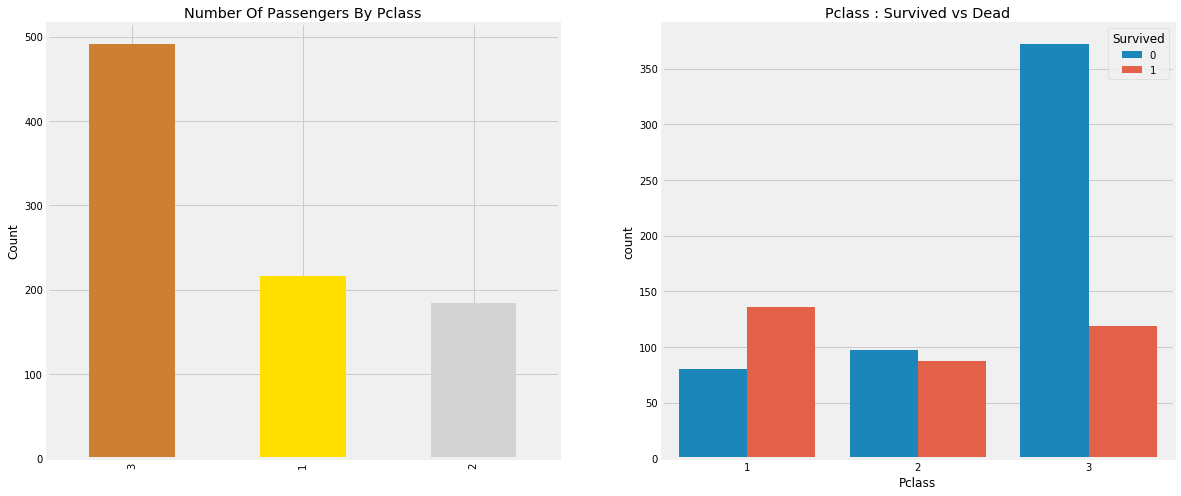

In [8]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

3등석 사람들이 가장 많았지만 가장 많이 사망한 것으로 나타난다. Pclass가 낮을수록 생존률이 높았다는 것을 확인할 수 있다.

#### Sex & Pclass

In [9]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins = True).style.background_gradient(cmap='summer_r')

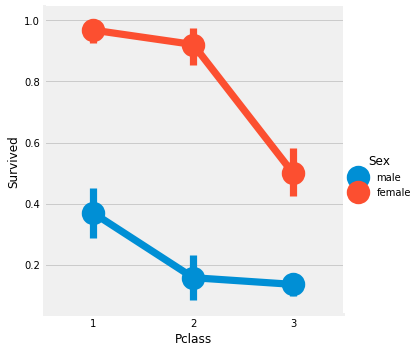

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

Pclass3의 female과 Pclass1의 male을 비교했을 때 전자가 생존확률이 더 높은 것을 알 수 있다. 

--> Sex보다 Pclass가 더 유의미한 지표이다.(분석의 중요성!)

### Continous Feature

    3.Age

In [11]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


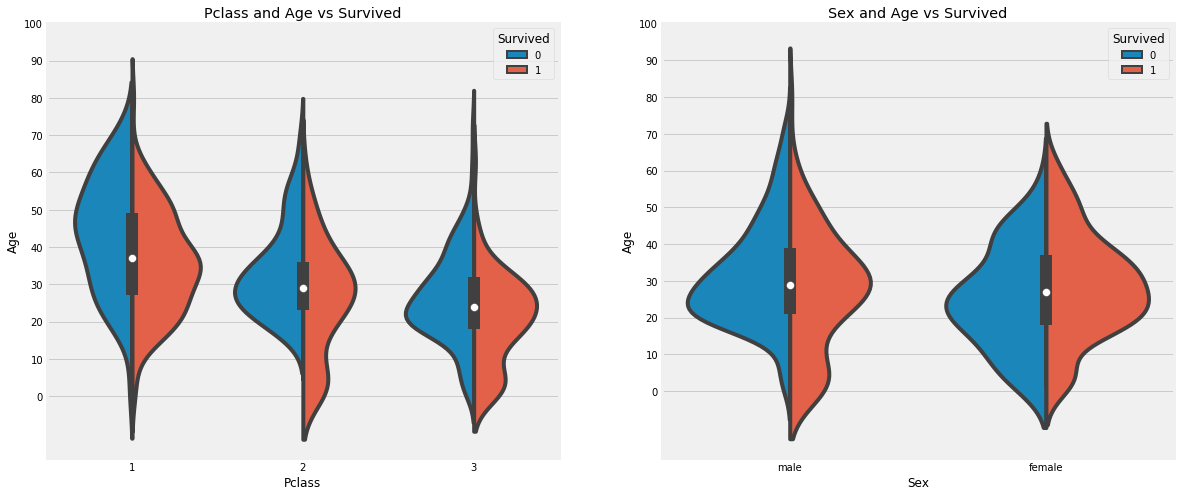

In [12]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue = "Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue = "Survived",data = data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Null Data 

Age 섹션에서 177개의 Null값을 확인할 수 있었다. 이를 해결하기 위해서 Null값을 나머지 사람들의 Age_mean값으로 채워도 되지만 이런 경우에는 사실 4살의 어린 아이가 29살이라는 값을 부여받게 된다.

--> 이를 해결하기 위해 이름을 살펴본다. 만약 앞에 Mr. 이나 Mrs. 같은 내용이 붙는다면 혹은 붙지 않는다면에 따라 다른 평균치를 채울 수 있을 것이다.

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  #([A-Za-z]+)\. : A~Z와 a~z사이의 문자를 뽑고 .로 마무리되는 문자열을 추춘하는 것이다. Mr. Mrs.를 뽑기에 좋음

In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mile과 Mme 값은 값들은 Miss를 잘못 스펠링 한 것이다. --> 값 변환을 시켜주자

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
#inplace = True : 새로운 객체를 생성하지 않고 기존 객체를 수정하는 과정
#data.replace : 결측값을 다른 값으로 교체하기

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### 결측치 채우기

In [17]:
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33  #Age값은 null이면서 Initial은 Mr인 부분의 Age에 33을 대입
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'),'Age'] = 46

In [18]:
data.Age.isnull().any()  #any() : 객체중 어느하나라도 True면 True를 반환. 모두 False라면 False 반환
#null_data가 모두 사라짐을 확인

False

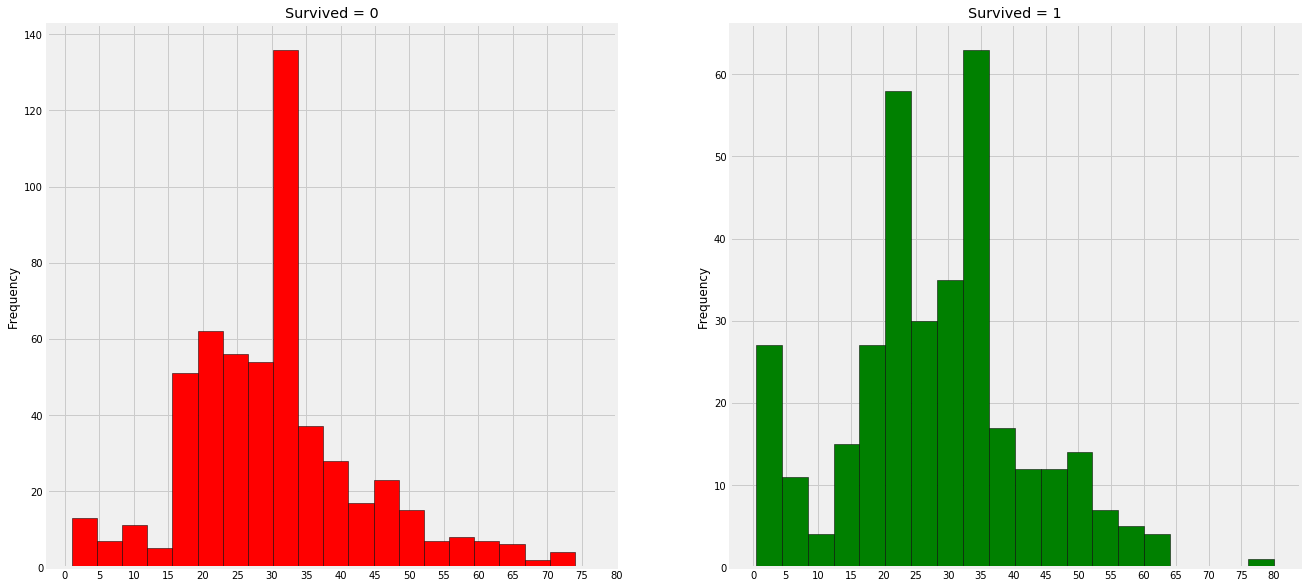

In [19]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor = 'black',color = 'red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor = 'black',color = 'green')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

어린아이(5세 이하)는 많이 구출 되었다. -> 여자와 아이를 먼저 구한 사실을 알 수 있다.

가장 나이가 많은 승객도 구출되었다.

가장 사망률이 높은 나이 구간은 30~40이다.

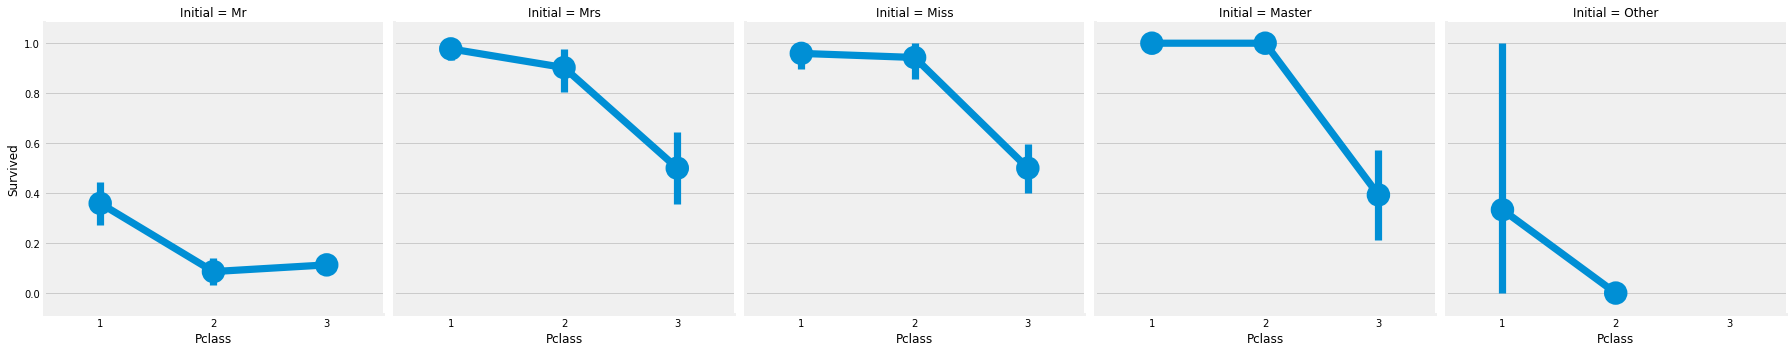

In [20]:
sns.factorplot('Pclass','Survived',col = 'Initial',data=data)
plt.show()

### Categorical Data
    
    5.Embarked

In [21]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

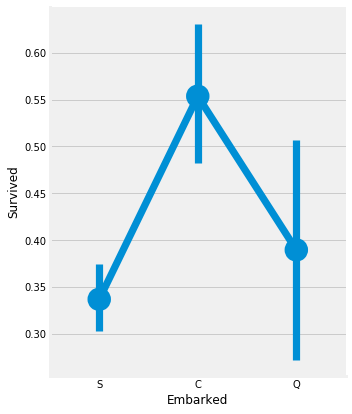

In [22]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()  #현재 객체 불러오기
fig.set_size_inches(5,6)  #크기 조절
plt.show()

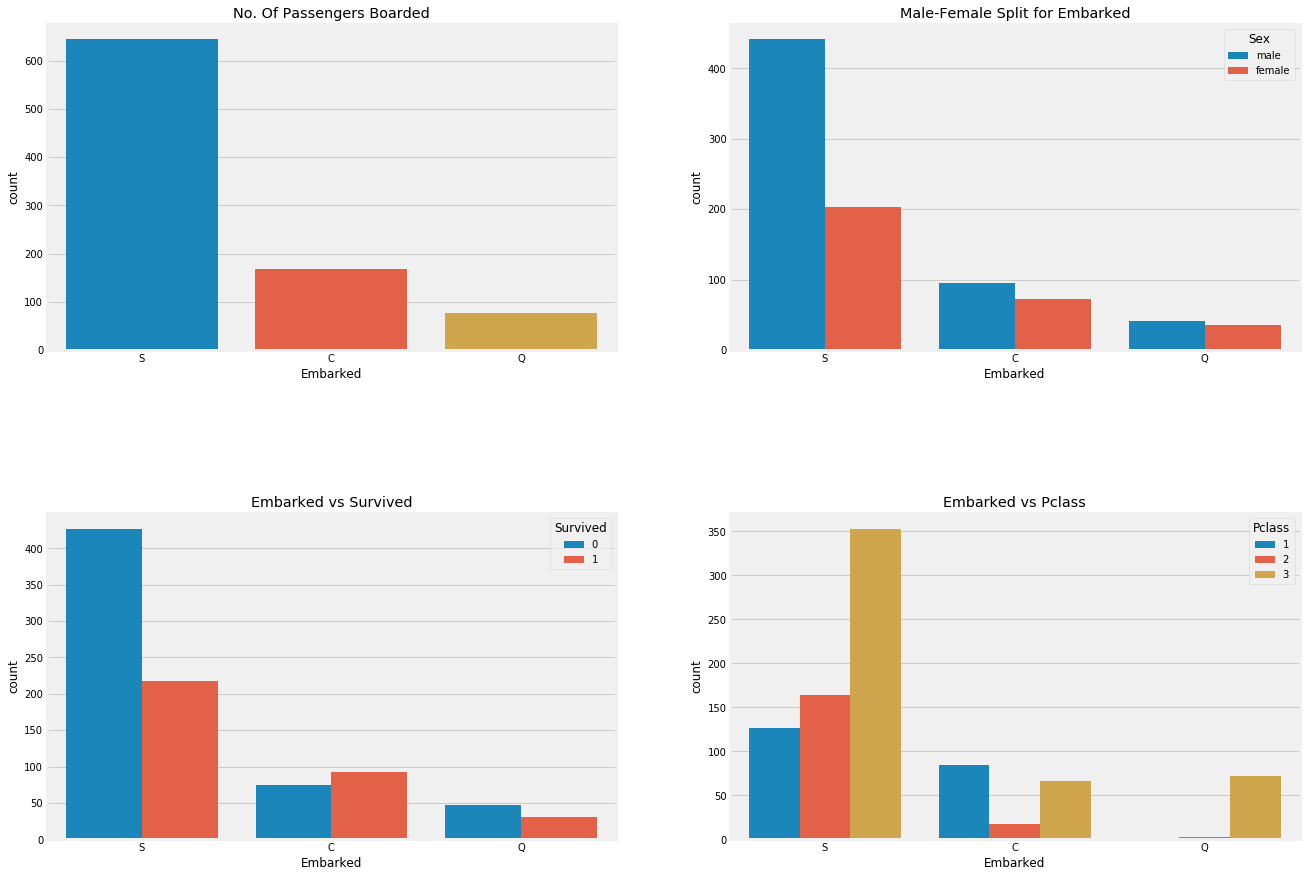

In [23]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data = data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue = 'Sex',data = data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue = 'Survived',data = data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue = 'Pclass',data = data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)  #subplot간의 간격 조절
plt.show()

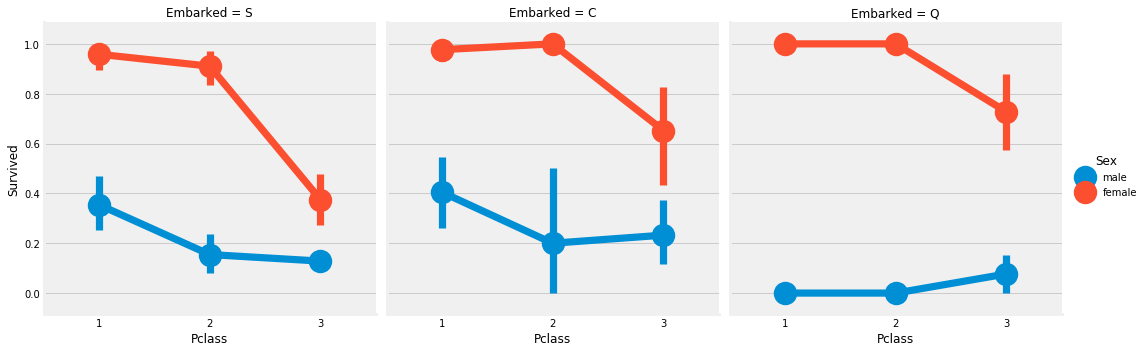

In [24]:
sns.factorplot('Pclass','Survived',hue = 'Sex',col = 'Embarked',data = data)
plt.show()

Embarked 결측 채우기 : 가장 많은 탑승객이 S에서 승선했기 때문에 NaN을 S로 채운다

In [25]:
data['Embarked'].fillna('S',inplace = True)  #fillna 함수 : 결측치를 채우는 함수. inplace = True를 적용한다면 다른 객체를 반환하지 않고 기존 표를 수정 

In [26]:
data.Embarked.isnull().any()  #결측치 존재 확인

False

### SibSip

    sibling = brother, sister, stepbrother, stepsister
    
    spouse = husband, wife

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


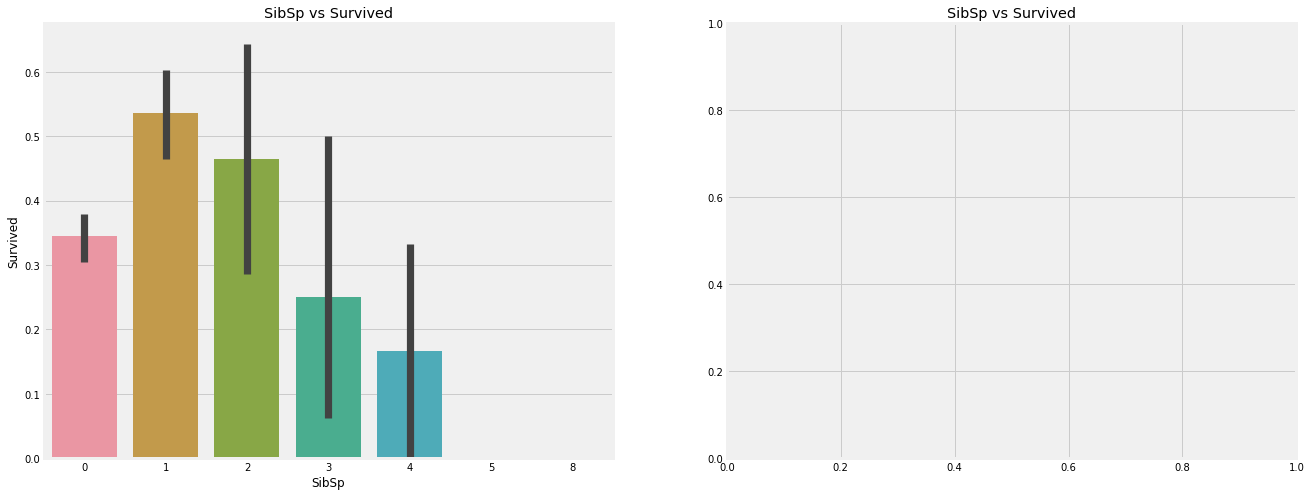

In [28]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('SibSp','Survived',data = data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch (family)

In [30]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Pclass : 3인 경우 대가족이 많다.

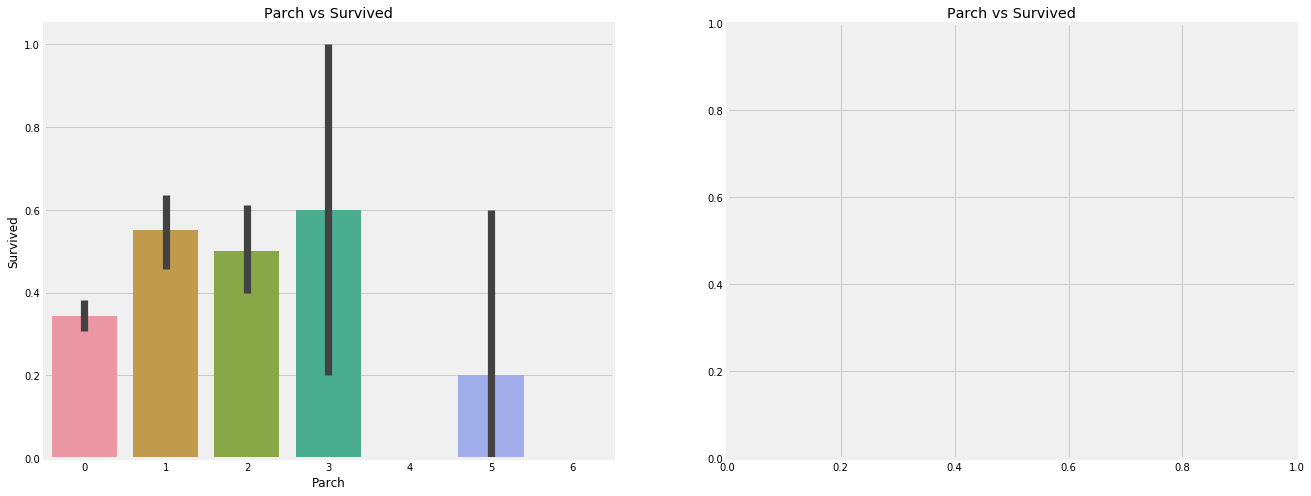

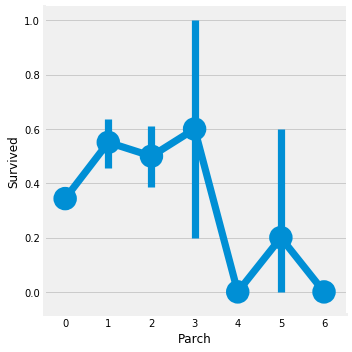

In [31]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('Parch','Survived',data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

### Fare (continous Feature)

In [32]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


Text(0.5, 1.0, 'Fares in Pclass 3')

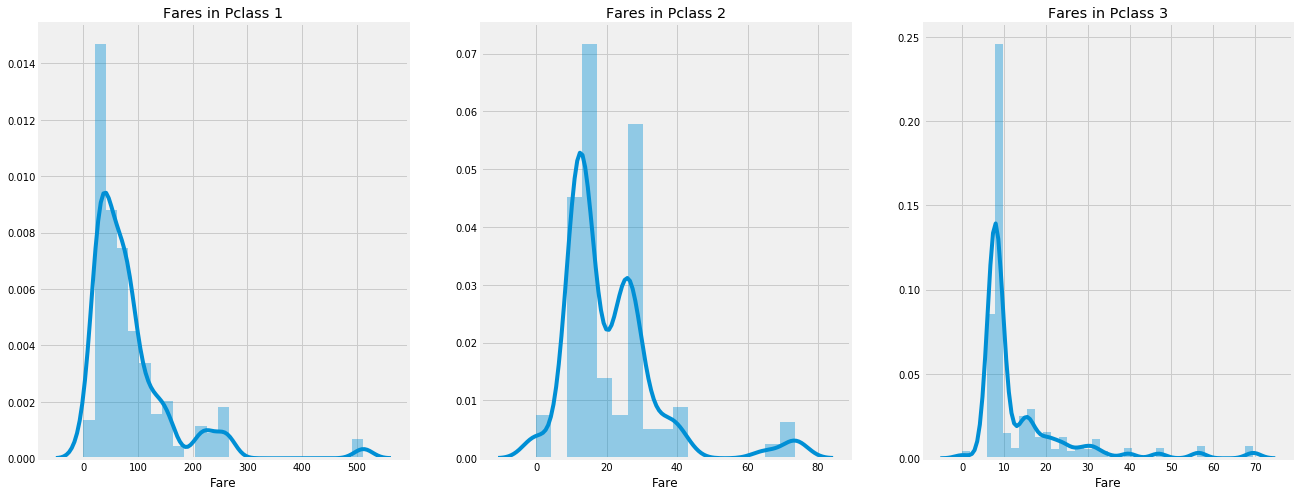

In [33]:
f, ax = plt.subplots(1,3,figsize = (20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])  #러그 + 밀도함수. Pclass가 1인 Fare data
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])  #러그 + 밀도함수
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])  #러그 + 밀도함수
ax[2].set_title('Fares in Pclass 3')

### Observation for all features

Sex : men < women suverved rate

Pclass : 1 > 2 > 3

Age : Children have a high chance of survival. 15~35 death rate is highest

Embarked : C have a high chance of survival even though most of Pclass 1 people aboarded on S

Parch + SibSp : having 1~2 sibsp or 1~3 parents shows greater chance of probability rather than being alone or having a larger family

### Correlation Between The Features

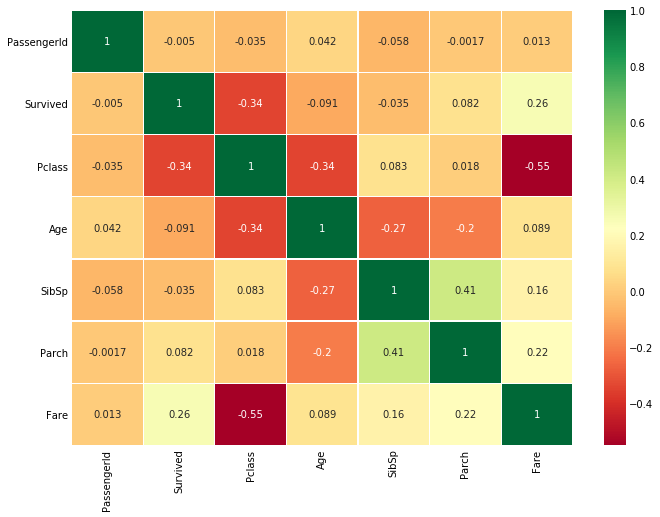

In [34]:
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn', linewidths = 0.2)  #annot : 셀 별로 계술 표시
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### heatmap

: 숫자들의 상관관계만 표시할 수 있다. 문자와는 비교가 불가능(별도의 전처리 과정이 필수)

Positive Correlation : 비례관계. 1에 가까울수록 완벽하게 비례한다고 생각할 수 있다.

Negative Correlation : 반비례관계, -1에 가까울수록 완벽하게 반비례한다고 생각할 수 있다.

MultiColinearity (다중공선성) : Correlation이 1이나 -1에 거의 가까운 경우 두 지표는 MultiColinearity라고 한다. 둘의 데이터가 거의 유사하다는 것을 의미한다. 

--> 이런경우 하나의 지표를 제거해준다. training time을 줄일 수 있고, 만약 포함하더라도 장점이 거의 없기 때문.

이 data의 경우 correlation이 높은 지표들이 없다. (higest correlation : 0.41) --> 모든 지표 사용

# Feature Engineering

모델의 성능을 높이기 위해 feature를 제거하거나 추출, 합하는 과정이 필요하다. 이런 과정을 feature engineering이라고 한다.

### Age_band

Age는 연속적인 데이터이다. 데이터 분석적인 측면에서 봤을 때 연속적인 데이터는 처리가 힘들다.

(ex. 30명의 사람이 있다면 최소 15~20개의 Age value가 존재한다. 이들을 모두 따로 처리하는 것은 비효율적)

그러므로 이런 연속적인 값을 카테고리 기준으로 분류한다. (Binning, Normalisation)

이번 데이터에서는 80까지의 데이터가 있기 때문에 0~80까지 5 bins로 나누겠다. bins의 사이즈는 16

In [35]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0  #Age가 16이하인 행의 Age_band 값에 0을 대입한다.
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')  #to_frame() : 수열을 데이터 프레임에 넣어준다

,Age_band
1,382
2,325
0,104
3,69
4,11


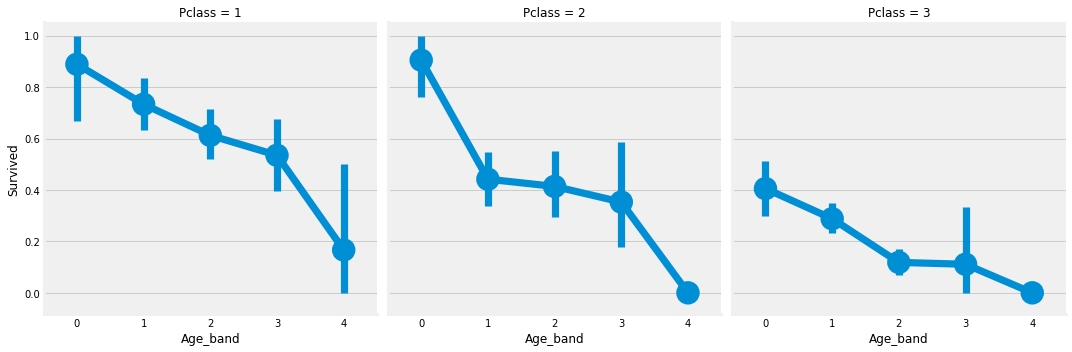

In [37]:
sns.factorplot('Age_band','Survived',data = data, col='Pclass')
plt.show()

Pclass에 관계없이 나이가 많아질수록 생존확률이 떨어지는 것을 볼 수 있다.

### Familiy_Size and Alone

기존에 없던 Family_Size와 Alone이라는 feature를 새롭게 생성하는 것이다. (Parch와 SibSp를 사용)

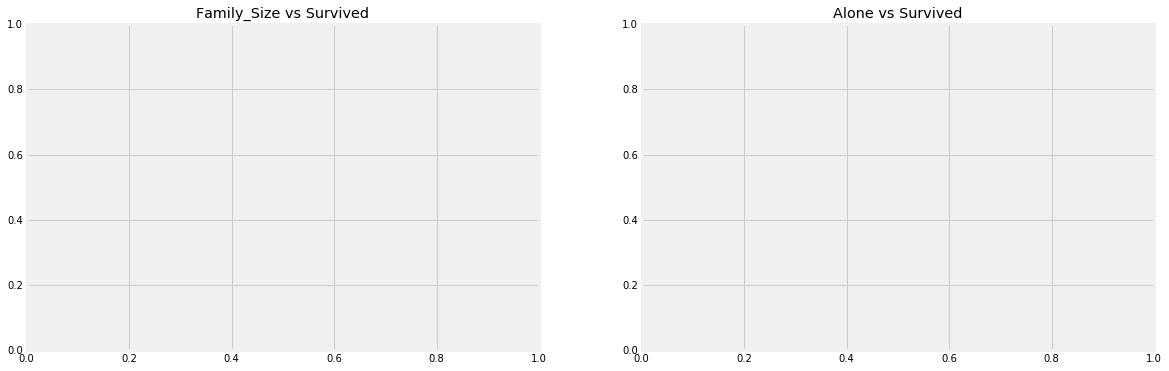

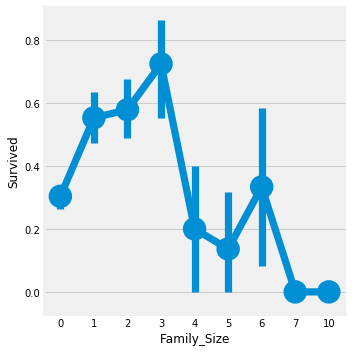

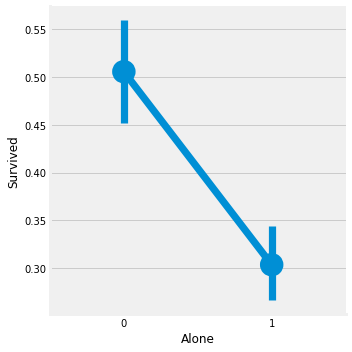

In [38]:
data['Family_Size'] = 0 
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1  #family_size가 0일때, alone열에 1을 부여

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data = data, ax = ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

혼자인 것보다 가족이 있는게 생존확률이 높았다는 것을 확인할 수 있다.

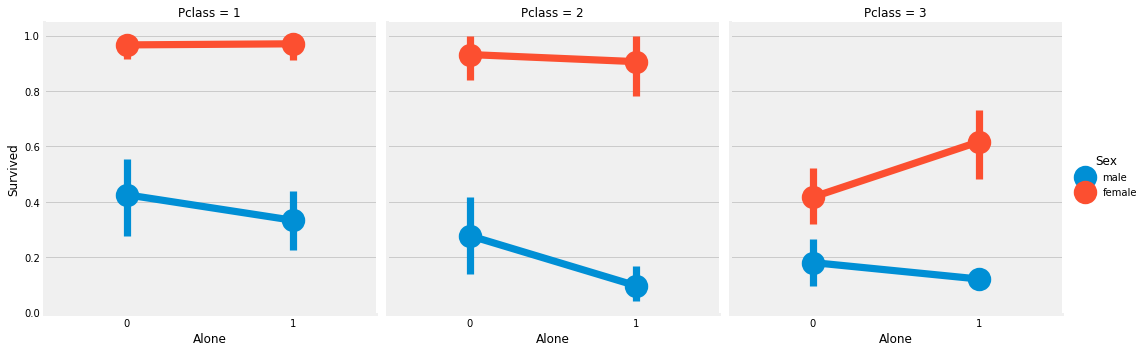

In [39]:
sns.factorplot('Alone','Survived',data=data,hue = 'Sex',col='Pclass')
plt.show()

Pclass 3의 female의 경우를 제외하곤 모두 비슷한 경향을 보여주었다.

### Fare_Range

Fare 역시 연속적인 데이터이므로 Ordinal Value로 바꾸고자 한다. (pandas.qcut을 사용)

pandas.qcut : 동일개수로 데이터를 나누어 groupby로 묶는 함수

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


높은 요금을 지불 할수록 생존률이 높아진다.

In [41]:
#Fare_Range를 singleton_value로 바꿔준다.
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] =1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] =2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] =3

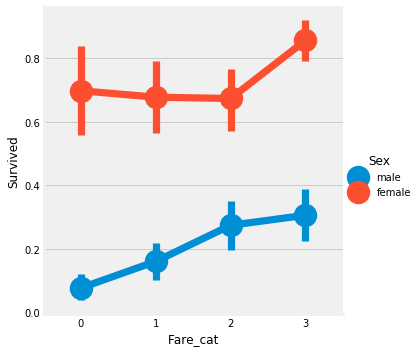

In [42]:
sns.factorplot('Fare_cat','Survived',data=data, hue='Sex')
plt.show()

Fare가 증가 할수록 생존률이 높아짐을 확인할 수 있다. --> 중요한 지표가 될 수 있다.

### convert string_data into Numeric data

Sex, Embarked --> numeric_data

In [43]:
data['Sex'].replace(['male','female'],[0,1],inplace = True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace = True)

### Dropping UnNeeded Features

Name : 불필요한 값 + categorical value로 바꿀수 없음.

Age : Age_band feature로 대체

Ticket : random string이기 때문에 categorised가 어렵다.

Fare : Fare_cat으로 대체

Cabin : 결측값이 너무 많기 때문에 feature 탈락

Fare_Range : Fare_cat으로 대체

Passengerld : categorised 될 수 없다.

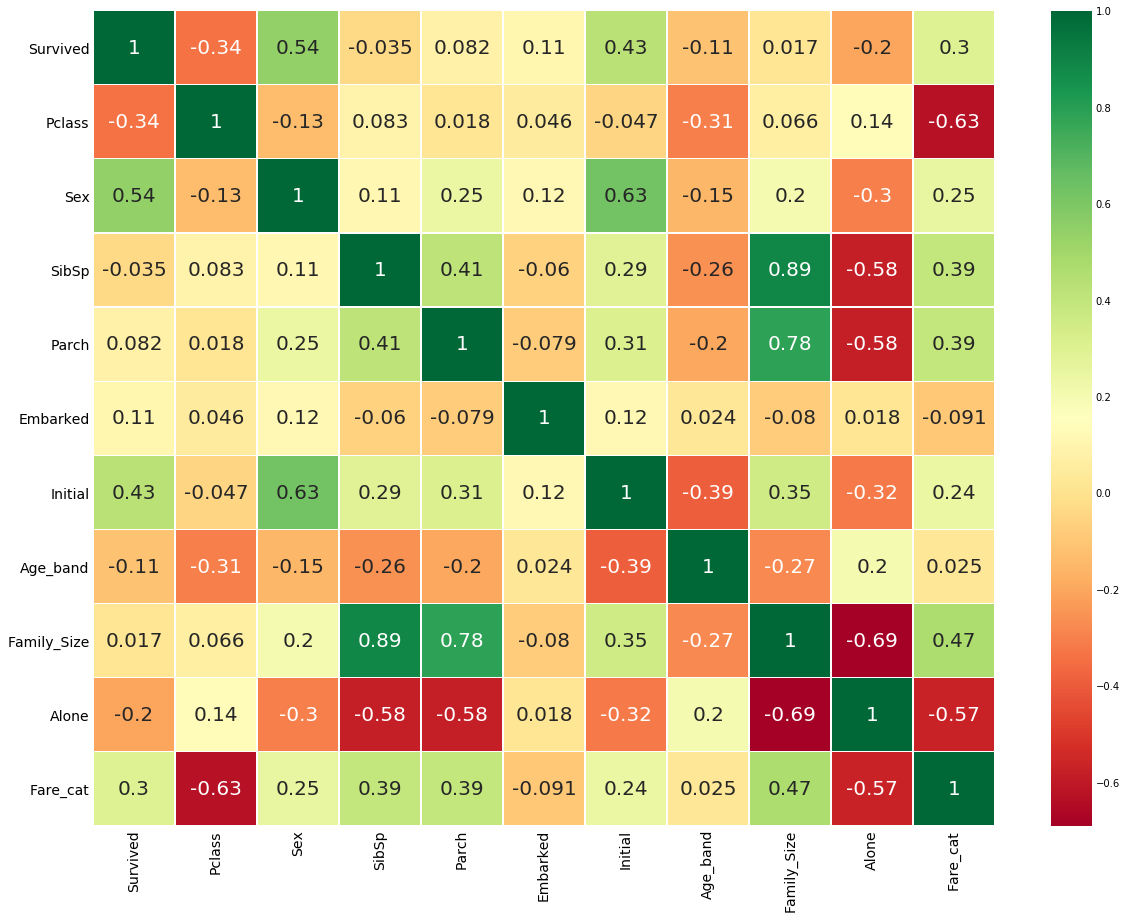

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Predictive Modeling

EDA만으로는 어떤 특성을 갖는 사람들이 생존하는지 예측하기는 힘들다. 그러므로 분류 알고리즘을 갖는 예측 모델을 만들 것이다.

1. Logistic Regression

2. Support Vector Machines(Linear and radial)

3. Random Forest

4. K-Nearest Neighbours

5. Naive Bayes

6. Decision Tree

7. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression  #로지스틱 회귀 사용 라이브러리
from sklearn import svm  #서포트 벡터 머신 : 적절한 결정경계를 찾는다고 일단은 생각하자
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier  #최근접이웃 알고리즘(KNN) : 근접한 데이터들로 미지의 데이터를 판단하는 것
from sklearn.naive_bayes import GaussianNB  #나이브베이지안 : 조건부확률
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  #학습, 검증 데이터 분리
from sklearn import metrics  #분류 성능평가 라이브러리
from sklearn.metrics import confusion_matrix

In [46]:
train, test = train_test_split(data,test_size = 0.3,random_state=0,stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

#### Radial Support Vector Machines (rbf-SVM)

In [47]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [48]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM  is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM  is 0.8171641791044776


#### Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [50]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### KNN

In [51]:
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('The accuarcy of the KNN is',metrics.accuracy_score(prediction5, test_Y))

The accuarcy of the KNN is 0.832089552238806


KNN의 정확도는 우리가 n_neighbors에 기여도를 변화시키면 변한다.

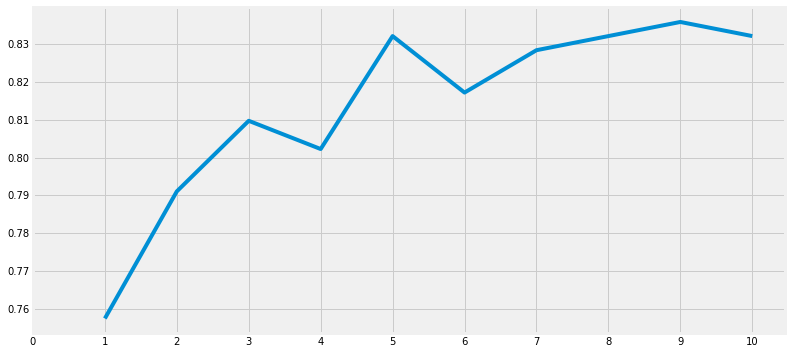

Accuracies of different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [52]:
#N_neighbors 변화시켜보기

a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
    
plt.plot(a_index,a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies of different values of n are:', a.values, 'with the max value as', a.values.max())

#### Gaussian Naive Bayes

In [53]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forest

In [54]:
model = RandomForestClassifier(n_estimators=100)  #n_estimator : 나무 가지의 개수
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597
